In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

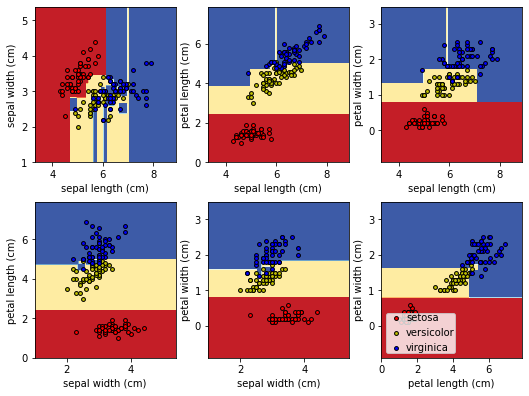

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
plot_colors = 'ryb'
plot_steps = .02

plt.figure(figsize=(8,6))
pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
for idx, pair in enumerate(pairs):
    X = iris.data[:, pair]
    y = iris.target
    # print(x)
    # print('--------')
    # print(y)
    # print('==============')
    
    model = DecisionTreeClassifier().fit(X, y)
    
    plt.subplot(2, 3, idx+1)
    plt.tight_layout(pad=2.5, h_pad=0.5, w_pad=0.5)
    
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    # print(x_min, x_max)
    y_min, y_max =  X[:, 1].min() -1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_steps),
        np.arange(y_min, y_max, plot_steps)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    # [(0, 'r'), (1, 'y'), (2, 'b')]
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(
            x=X[idx, 0],
            y=X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu
            ,edgecolors='black',
            s=15
        )
        
plt.legend(loc='lower left', borderpad=0, handletextpad=0) 
plt.axis('tight')
plt.show()
    

In [31]:
list(zip(range(n_classes), plot_colors))

[(0, 'r'), (1, 'y'), (2, 'b')]